#### 성능지표 - 분류
- 정확도 
- 정밀도
- 재현율
- f1-score
- 오차행렬(confusion matrix)

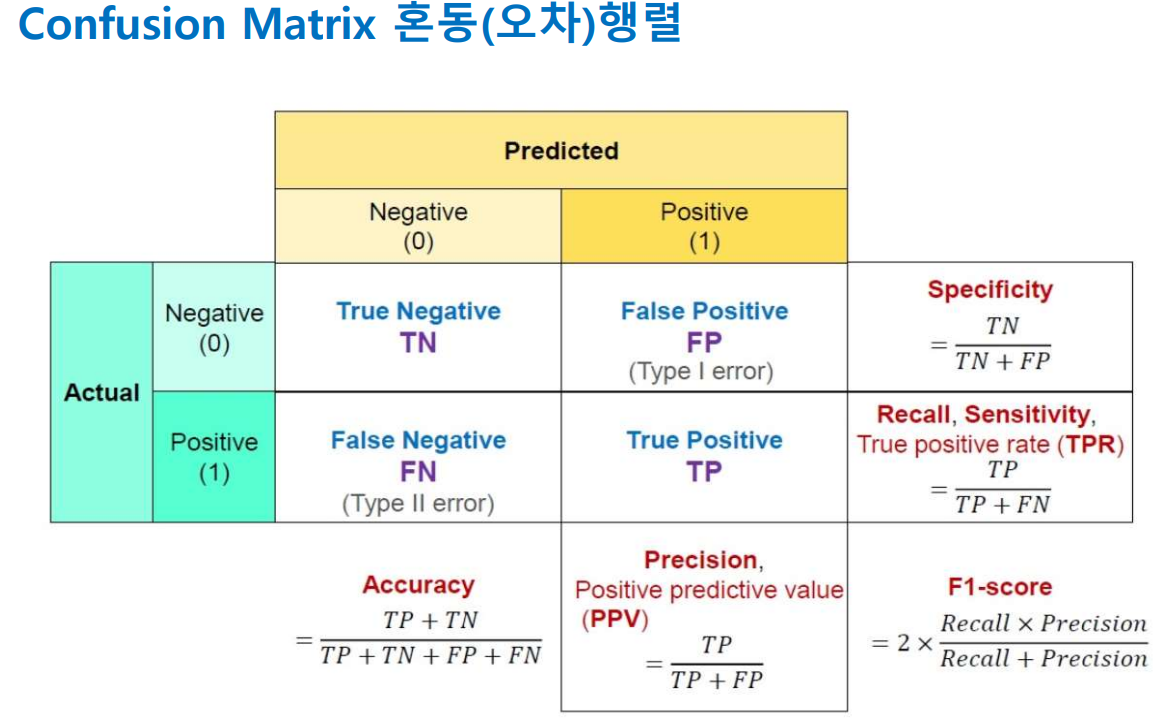

In [36]:
# [1] 데이터 준비
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, precision_score, r2_score, f1_score, confusion_matrix, recall_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [5]:
digitBunch=load_digits(as_frame=True)
# 피쳐와 레이블 추출
img_DF= digitBunch['data']

# 0~9 라벨 (숫자)
labelSR=digitBunch['target']

mask= (labelSR==7)

labelSR[~mask]=0
labelSR[mask]=1

In [6]:
labelSR.value_counts()

target
0    1618
1     179
Name: count, dtype: int64

In [7]:
X_train, X_test, Y_train, Y_test= train_test_split(img_DF, labelSR, random_state=10)

In [8]:
print(Y_train.value_counts()/ Y_train.shape[0])
print(Y_test.value_counts()/ Y_test.shape[0])
# 항상 0으로 예측만 해도 정확도 90%-> 다른 평가 지표 필요!

target
0    0.902004
1    0.097996
Name: count, dtype: float64
target
0    0.895556
1    0.104444
Name: count, dtype: float64


In [9]:
# [4] 클래스 정의
from sklearn.base import BaseEstimator
# 사용자 정의 클래스 Dummyclass: 아무것도 하지 않는 클래스, 단순 테스트용
class Myclassifier(BaseEstimator):

    def fit(self, x, y):
        pass
    def predict(self, x):
        return np.zeros((len(x),1), dtype=bool)  #x행 1열 0(false)으로 생성
    

In [10]:
# [5] 학습
model= Myclassifier()
model.fit(X_train, Y_train)

pre= model.predict(X_train)
pre

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [11]:
accuracy_score(Y_train, pre)
# 항상 0으로 예측만 해도 정확도 90%->  불균형 데이터에 대한 평가 지표 필요!

0.9020044543429844

In [16]:
# 오차 행렬 (confusion matrix)
print(confusion_matrix(Y_train, pre, labels=[0,1]))

(tn, fp, fn, tp)= confusion_matrix(Y_train, pre).reshape(-1)
print((tn, fp, fn, tp))

[[1215    0]
 [ 132    0]]
(1215, 0, 132, 0)


In [22]:
Y_test=[0,0,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0]
Y_pre= [1,1,1,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0]

In [29]:
(tn, fp, fn, tp)= confusion_matrix(Y_test, Y_pre).reshape(-1)
print(tn, fp, fn, tp)
confusion_matrix(Y_test, Y_pre)

9 4 0 7


array([[9, 4],
       [0, 7]], dtype=int64)

In [37]:
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [38]:
# 임계값에 대한 정밀도-재현율 도출하는 함수 -> precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
titanic_df= pd.read_csv('../Data/tatanic.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [ ]:
# precision_recall_curve(실제값, predict_proba를 사용한 예측값)==> 정밀도, 재현율, 임계값 나옴

In [39]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
반환된 precisions 배열의 Shape: (166,)
반환된 recalls 배열의 Shape: (166,)
thresholds 5 sample: [0.01974988 0.06956416 0.0840281  0.08474207 0.08920162]
precisions 5 sample: [0.34078212 0.34269663 0.34463277 0.34659091 0.34857143]
recalls 5 sample: [1. 1. 1. 1. 1.]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값:  [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도:  [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율:  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]
